In [1]:
import re

In [2]:
import requests

In [3]:
import numpy as np
import pandas as pd

# Obtendo os dados
Os dados foram publicados originalmente por Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.  
O dataset esta disponível em http://lib.stat.cmu.edu/datasets/boston  

In [4]:
resp = requests.get('http://lib.stat.cmu.edu/datasets/boston', timeout=10)
text = resp.text

In [5]:
# # lendo o dataset do disco (nunca se sabe se a internet estará boa)
# with open('boston') as f:
#     text = f.read()

In [6]:
# parsing
intro, var, data = text.split('\n\n')

In [7]:
# descrição das variáveis
print(var)

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's


In [8]:
# mais parsing
var = [i.strip().split(' ')[0] for i in var.split('\n')[1:]]

In [9]:
# adivinha o que mais...
d = []
for n, line in enumerate(data.split('\n')):
    if n % 2 == 0:
        aux = re.split('\s+', line.strip())
    else:
        d.append(aux + re.split('\s+', line.strip()))

In [10]:
# criando um dataframe (tabela) com os dados
df = pd.DataFrame(d, columns=var)

In [11]:
# transformando as colunas para números
df = df.astype(np.float)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# # Execute essa célula na primeira vez que rodar esse notebook
# # Ela baixa datasets extras que serão utilizados em alguns exemplos e salva no seu computador
# import bokeh
# bokeh.sampledata.download()

# Matplotlib

###### Histograma dos preços médios

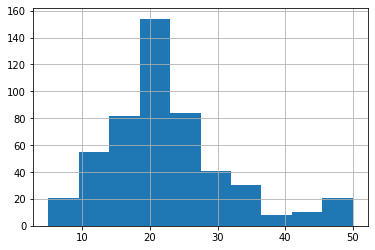

In [16]:
df.MEDV.hist()

###### Relação entre 'percentual da população pertencente a classe baixa' (LSTAT) e 'preço médio'

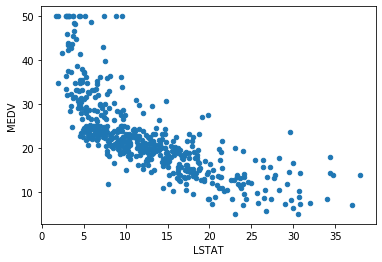

In [17]:
df.plot.scatter(x='LSTAT', y='MEDV')

# Bokeh
https://github.com/bokeh/bokeh

###### Comparativo:

Matplotlib:  
> Criado: 2002  
> Used by: 143k  
> Stars: 10.4k  
  
Bokeh:
> Criado: 2013  
> Used by: 15.3k  
> Stars: 12.1k  

Plotly:
> Criado: 2012  
> Used by: 2  
> Stars: 5.7k 

###### Stackoverflow Trends

<img src="./stackoverflow.png" />

In [18]:
from bokeh.plotting import figure, show

In [19]:
def make_hist(title, hist, edges):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(
        top=hist,
        bottom=0,
        left=edges[:-1],
        right=edges[1:],
        fill_color="navy",
        line_color="white",
        alpha=0.5
    )

    p.y_range.start = 0
    p.xaxis.axis_label = 'MEDV'
    p.yaxis.axis_label = 'Qnt'
    p.grid.grid_line_color="white"
    return p

In [20]:
p = make_hist('Histograma', *np.histogram(df.MEDV))
show(p)

### Alguma interatividade
(código <s>copiado descaradamente</s> emprestado de https://github.com/bokeh/bokeh/blob/master/examples/app/selection_histogram.py)  

Para iniciar o servidor:  
```bokeh serve selection_histogram.py```

Para acessar a página com o gráfico:  
http://localhost:5006/selection_histogram  

### Bokeh server

![bokeh_server.png](./bokeh_server.png)

### Mais velocidade - [WebGL](https://en.wikipedia.org/wiki/WebGL)
WebGL renderiza os gráficos no browser utilizando uma placa de video

In [21]:
k = 100
x = np.repeat(df.LSTAT, k) + np.random.normal(loc=0, scale=1, size=df.shape[0] * k)
y = np.repeat(df.MEDV, k) + np.random.normal(loc=0, scale=1, size=df.shape[0] * k)

In [ ]:
p = figure(output_backend="canvas")
p.scatter(x, y, alpha=0.1)
show(p)

In [ ]:
p = figure(output_backend="webgl")
p.scatter(x, y, alpha=0.1)
show(p)

* * *

# Holoviews
https://github.com/holoviz/holoviews  
Holoviews é uma camada de abstração do bokeh ou matplotlib que facilita a visualização dos gráficos

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
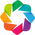

In [22]:
import holoviews as hv
# você pode definir o backend primário para o bokeh ou para o matplotlib
hv.extension('bokeh', 'matplotlib')

###### Gráficos com uma linha

In [23]:
hv.Scatter(df[['LSTAT', 'MEDV']])

:Scatter   [LSTAT]   (MEDV)

###### Configurações simples

In [24]:
%opts Scatter Distribution Histogram Curve Area Violin [width=500 height=300 show_grid=True]
# o cell magic %opts configura os gráficos que serão plotados em todas as outras células
# caso prefira, por utilizar %%opts para configurar somente os gráficos da célula atual

In [25]:
hv.Scatter(df[['LSTAT', 'MEDV']])

:Scatter   [LSTAT]   (MEDV)

In [26]:
hv.Distribution(df.MEDV)

:Distribution   [MEDV]   (Density)

In [27]:
# com .opts() é possível configurar um gráficos individualmente. Semelhante ao %%opts
hv.Image(
    df.corr().values
).opts(width=500, height=400, colorbar=True, xaxis=None, yaxis=None, cmap='Viridis', tools=['hover'])

:Image   [x,y]   (z)

In [28]:
# gráficos de área
# código de http://holoviews.org/gallery/demos/bokeh/hextile_movie_ratings.html#bokeh-gallery-hextile-movie-ratings
# Este exemplo utiliza os datasets extras
import sqlite3
from bokeh.sampledata import movies_data

# Load data
conn = sqlite3.connect(movies_data.movie_path)
movies = pd.read_sql('SELECT userRating, imdbRating FROM omdb, tomatoes WHERE omdb.ID = tomatoes.ID', conn)

# Declare element
hextiles = hv.HexTiles(movies, [('userRating', 'Tomato User Rating'), ('imdbRating', 'IMDb Rating')], [])
bivariate = hv.Bivariate(hextiles)

(hextiles * bivariate).opts(
    hv.opts.Bivariate(show_legend=False),
    hv.opts.HexTiles(width=500, height=500, min_count=0)
)

:Overlay
   .HexTiles.I  :HexTiles   [userRating,imdbRating]
   .Bivariate.I :Bivariate   [userRating,imdbRating]   (Density)

###### Sobrepor gráficos

In [29]:
# No holoviews, cada gráfico é um elemento.
# Os elementos podem ser agrupados em containers (que também são elementos)
# Ele ja tem overload para vários tipos diferentes de containers
dist1 = hv.Distribution(df.MEDV, label='Geral')
dist2 = hv.Distribution(df[df.RAD==24].MEDV, label='rad 24')
dist3 = hv.Distribution(df[df.RAD==5].MEDV, label='rad 5')
dist4 = hv.Distribution(df[df.RAD==4].MEDV, label='rad 4')
# ao utilizar o * para esses elementos, será gerado um Overlay
dist1 * dist2 * dist3 * dist4

:Overlay
   .Distribution.Geral  :Distribution   [MEDV]   (Density)
   .Distribution.Rad_24 :Distribution   [MEDV]   (Density)
   .Distribution.Rad_5  :Distribution   [MEDV]   (Density)
   .Distribution.Rad_4  :Distribution   [MEDV]   (Density)

In [30]:
# Se for utilizado o + , eles são plotados lado a lado
dist1 + dist2 + dist3 + dist4

:Layout
   .Distribution.Geral  :Distribution   [MEDV]   (Density)
   .Distribution.Rad_24 :Distribution   [MEDV]   (Density)
   .Distribution.Rad_5  :Distribution   [MEDV]   (Density)
   .Distribution.Rad_4  :Distribution   [MEDV]   (Density)

###### Sobreposições avançadas

In [31]:
# interpolando
a, b, c = np.polyfit(df.MEDV, df.LSTAT, deg=2)
x = df.LSTAT.sort_values()
y = a*x**2 + b*x + c

In [32]:
# É possivel agrupar elementos diferentes
scatter = hv.Scatter(df[['LSTAT', 'MEDV']])
line = hv.Curve((x, y)).opts(color='red')
margin = hv.Area((x, y+10+np.sin(x), y-10+np.cos(x)), vdims=['y', 'y2']).opts(color='red', alpha=0.3)
scatter * line * margin

:Overlay
   .Scatter.I :Scatter   [LSTAT]   (MEDV)
   .Curve.I   :Curve   [x]   (y)
   .Area.I    :Area   [x]   (y,y2)

######  Conteiners com vários gráficos

In [33]:
d = {
    rad: hv.Scatter(df[df.RAD==rad][['LSTAT', 'MEDV']])
    for rad
    in df.RAD.value_counts().head().index
}

In [34]:
# Outro container é o HoloMap
# Semelhante ao Overlay, porém é possível escolher a dimensão que vamos visualizar.
hv.HoloMap(d, kdims='RAD')

:HoloMap   [RAD]
   :Scatter   [LSTAT]   (MEDV)

###### Gráficos para várias aplicações

In [35]:
# pydicom é uma biblioteca para trabalhar com arquivos dicom.
# eles são o padrão de-facto para imagens médicas
import pydicom

In [36]:
# Não posso compartilhar esses arquivos diretamente.
# Mas vc pode baixar eles no kaggle, aceitando os termos e se inscrevendo na competição abaixo:
# https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection
files = [
    'ID_6615d850d.dcm', 'ID_300d150c2.dcm', 'ID_c28f81874.dcm', 'ID_3f52d93f3.dcm', 'ID_297de11e6.dcm', 
    'ID_c3fc98bc3.dcm', 'ID_8513faa7b.dcm', 'ID_61e91a064.dcm', 'ID_78f00fa52.dcm', 'ID_1ab42db3e.dcm', 
    'ID_2a6ee4e82.dcm', 'ID_8f67819e6.dcm', 'ID_c9585f69d.dcm', 'ID_ea8f6a8b8.dcm', 'ID_e14b4c2c9.dcm', 
    'ID_6bd7ed96a.dcm', 'ID_37bff46aa.dcm', 'ID_7d85e14d5.dcm', 'ID_d0e567af1.dcm', 'ID_1909291a9.dcm', 
    'ID_90a2eb5c4.dcm', 'ID_67a53dfe9.dcm', 'ID_197bbb138.dcm', 'ID_4ed32c86e.dcm', 'ID_c74fdf274.dcm', 
    'ID_bdb27ee22.dcm', 'ID_aa2a0dfac.dcm', 'ID_a0058f033.dcm', 'ID_22bf22d22.dcm', 'ID_85a3261b8.dcm', 
    'ID_216b49104.dcm', 'ID_04eae359a.dcm', 'ID_6cdc31a35.dcm', 'ID_8c96f0169.dcm', 'ID_c7fabed13.dcm', 
    'ID_69f73219d.dcm', 'ID_321e273df.dcm', 'ID_6be8c2449.dcm', 'ID_2e56203d1.dcm', 'ID_45f873636.dcm', 
    'ID_e97d8e040.dcm', 'ID_75d8179ac.dcm', 'ID_310eb0e95.dcm', 'ID_134bbb504.dcm', 
]

In [37]:
d = {}
for n, file in enumerate(files):
    # lendo os dados
    dicom = pydicom.dcmread(f'data/{file}')
    # obtendo os arrays com as imagens
    arr = dicom.pixel_array
    # transformando numa escala de cinza
    # Imagens de tomografia computadorizada não são salvas com RGB, mas como HU
    # Aqui a gente interpola a escala do HU para a de um RGB em tom de cinza
    arr = arr - arr.min()
    arr = arr / arr.max()
    arr = arr * 255
    # note que as imagens precisam ser passadas na ordem correta
    d[n] = hv.Image(arr).opts(cmap='gray', width=400, height=400)

In [ ]:
hv.HoloMap(d)

Código abaixo de http://holoviews.org/gallery/demos/bokeh/texas_choropleth_example.html

In [39]:
# Este exemplo utiliza os datasets extras
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

In [40]:
counties = [
    dict(county, Unemployment=unemployment[cid])
    for cid, county
    in counties.items()
    if county["state"] == "tx"
]

# o elemento Polygons plota shape files
choropleth = hv.Polygons(counties, ['lons', 'lats'], [('detailed name', 'County'), 'Unemployment'])

In [41]:
# muitas configurações para um gráfico bonitinho...
# Experimente plotar esse gráfico antes de configurar ele ;)
choropleth.opts(
    hv.opts.Polygons(
        logz=True, tools=['hover'], xaxis=None, yaxis=None, show_grid=False, show_frame=False, 
        width=500, height=500, color_index='Unemployment', colorbar=True, toolbar='above',
        line_color='white'
    )
)

:Polygons   [lons,lats]   (detailed name,Unemployment)

### Não plote os gráficos na mão. Anote os dados!
O holoviews permite que vc faça anotações básicas sobre o seu dataset  
Assim vc utiliza mais tempo visualizando do que programando gráficos

In [42]:
# Uma variável extra só pra ter mais coisas pra plotar
df['DUMMY'] = df.MEDV.apply(lambda x: int(x) % 5)

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,DUMMY
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [44]:
# você pode fazer um gráficos simples somente declarando o nome das suas variáveis
# kdims = key dimensions = variáveis independentes
# vdims = value dimensions = variáveis dependentes
hv.Scatter(df, kdims='LSTAT', vdims='MEDV')

:Scatter   [LSTAT]   (MEDV)

In [45]:
hv.Violin(df, kdims='RAD', vdims='MEDV')

:Violin   [RAD]   (MEDV)

In [46]:
# o dataset é um elemento especial que mapeia um dataframe e várias variáveis de interesse
ds = hv.Dataset(
    df,
    kdims=['LSTAT', 'DUMMY'],
    vdims=['MEDV', 'AGE'],
)

In [47]:
# ele pode ser transformado em elementos gráficos
ds.to(hv.Scatter)

:HoloMap   [DUMMY]
   :Scatter   [LSTAT]   (MEDV,AGE)

In [48]:
# como já tem as variáveis de interesse, os elementos de um gráfico podem ser colocados num Overlay
scatter = ds.to(hv.Scatter).overlay()
hv.Overlay(scatter)

:Overlay
   .NdOverlay.I :NdOverlay   [DUMMY]
      :Scatter   [LSTAT]   (MEDV,AGE)

In [49]:
# um overlay também pode ser transformado para um GridSpace (outro container)
hv.GridSpace(scatter)

:GridSpace   [DUMMY]
   :Scatter   [LSTAT]   (MEDV,AGE)

In [50]:
# ou um GridMatrix
hv.GridMatrix(scatter)

:GridMatrix   [DUMMY]
   :Scatter   [LSTAT]   (MEDV,AGE)

In [51]:
# e voltar para o HoloMap novamente
hv.HoloMap(scatter)

:HoloMap   [DUMMY]
   :Scatter   [LSTAT]   (MEDV,AGE)